Hier worden de benodigde libraries geimporteerd. Het is niet toegestaan om andere libraries, zoals tensorflow of keras, te gebruiken. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

hier volgen een aantal functies die je zelf moet schrijven. 
Uitleg over wat je moet schrijven vind je met commentaar 

In [2]:
def leesspiraal(filename):
    dataframe = pd.read_csv(filename)
    return dataframe
    # code

In [3]:
def berekenaccuracy(correct, fout):
    accuracy = correct / (correct + fout)
    return accuracy
    # code

In [4]:
def normaliseerspiraldataset(df):
    df["x"] = df["x"] - np.min(df["x"])
    df["y"] = df["y"] - np.min(df["y"])
    df["x"] = df["x"] / (np.max(df["x"]) - np.min(df["x"]))
    df["y"] = df["y"] / (np.max(df["y"]) - np.min(df["y"]))
    return df
    #code

In [5]:
def getX(spiral):
    return spiral["x"]
    # code

In [6]:
def getY(spiral):
    return spiral["y"]
    # code

In [7]:
def getLabels(spiral):
    return spiral["label"]
    # code

In [8]:
def traintestsplit(df):
    train = df.iloc[:800].reset_index(drop=True)
    test = df.iloc[800:].reset_index(drop=True)
    return train, test

In [9]:
def plotspiraldataset(x,y,labels):
    neg = np.where(labels==0)[0]
    pos = np.where(labels==1)[0]
    plt.scatter(x[neg],y[neg])
    plt.scatter(x[pos],y[pos])
    #plt.savefig('my_spiral.png')
    plt.show()

Hier begint de code van de Multi-Layer Perceptron (MLP). Dit zijn twee functies. De eerste traint het model. De tweede evalueert het model op de testset. 

In [10]:
def trainMLP(x, y, labels, epochs, lr, aantalneurons):
    #lr is de learning rate
    
    # W1,W2 zijn de weegfactoren
    # B1, B2 zijn de bias termen
    W1 = np.random.rand(aantalneurons,2)
    W2 = np.random.rand(2,aantalneurons)
    B1 = np.random.rand(aantalneurons,1)
    B2 = np.random.rand(2,1)
    
    print(W1.shape)
    print(W2.shape)
    print(B1.shape)
    print(B2.shape)
    
    # epoch is het aantal keer dat de gehele dataset wordt 
    # gebruikt voor training
    for k in range(epochs):
        correct = 0
        fout = 0
    
        for ind in range(len(x)):
        
            # de input data wordt in het juiste formaat gestopt
            X0 = np.transpose(np.matrix([x[ind], y[ind]]))
            label = labels[ind]
            lab= np.transpose(np.matrix([label,1-label]))
            
            #print(X0.shape)
        
            # dit is de gewogen som + ReLU activatie functie
            X1 = np.maximum(0,np.matmul(W1, X0)+B1)
            X2 = np.maximum(0,np.matmul(W2, X1)+B2)

            # Dit is de softmax activatie functie
            out = np.exp(X2)/np.sum(np.exp(X2))
    
            # hier worden de voorspellingen gedaan
            prediction = float(out[0])>0.5
            if lab[0]==prediction:
                correct = correct+1
            else:
                fout = fout+1
    
            # backpropagation
            error = np.subtract(out,lab)

            d2 = np.multiply(error,np.minimum(1,np.maximum(0,X2)))
            dW2 = np.matmul(d2,np.transpose(X1))
            dB2 = d2

            d1 = np.multiply(np.matmul(np.transpose(W2),d2),np.minimum(1,np.maximum(0,X1)))
            dW1 = np.matmul(d1,np.transpose(X0))
            dB1 = d1

            #update rule
            W1 = W1-lr*dW1
            W2 = W2-lr*dW2
            B1 = B1-lr*dB1
            B2 = B2-lr*dB2
    
        print('epoch_'+str(k)+"\t"+str(correct)+"\t"+str(fout))
        
    resultaat = np.array([W1,W2,B1,B2],dtype=object)
    return resultaat

In [11]:
def testMLP(x, y, labels, res):
    correct = 0
    fout = 0
    
    # W1,W2 zijn de weegfactoren
    # B1, B2 zijn de bias termen
    W1 = res[0]
    W2 = res[1]
    B1 = res[2]
    B2 = res[3]

    for ind in range(len(x)):
        # de input data wordt in het juiste formaat gestopt
        X0 = np.transpose(np.matrix([x[ind],y[ind]]))
        label = labels[ind]
        
        # dit is de gewogen som + ReLU activatie functie
        X1 = np.maximum(0,np.matmul(W1, X0)+B1)
        X2 = np.maximum(0,np.matmul(W2, X1)+B2)

        # dit is de softmax activatie functie
        out = np.exp(X2)/np.sum(np.exp(X2))
    
        # hier vindt de classificatie plaats
        prediction = float(out[0])>0.5
        
        if label==prediction:
            correct = correct+1
        else:
            fout = fout+1
            
    return correct,fout

### Hier begint de -main- die alle functies aanroept

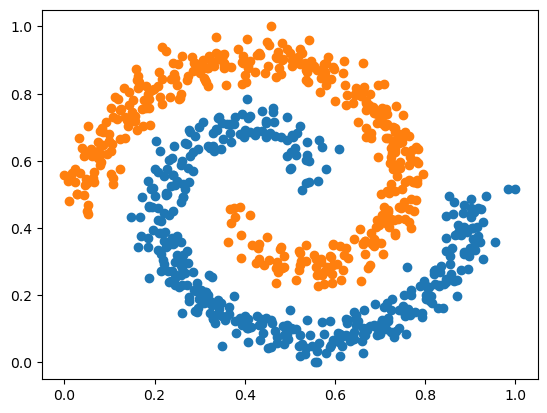

(8, 2)
(2, 8)
(8, 1)
(2, 1)
epoch_0	530	270
epoch_1	572	228
epoch_2	568	232
epoch_3	569	231
epoch_4	568	232
epoch_5	568	232
epoch_6	570	230
epoch_7	570	230
epoch_8	569	231
epoch_9	569	231
epoch_10	570	230
epoch_11	572	228
epoch_12	572	228
epoch_13	571	229
epoch_14	571	229
epoch_15	572	228
epoch_16	572	228
epoch_17	570	230
epoch_18	570	230
epoch_19	570	230
epoch_20	570	230
epoch_21	567	233
epoch_22	567	233
epoch_23	567	233
epoch_24	569	231
epoch_25	569	231
epoch_26	569	231
epoch_27	570	230
epoch_28	571	229
epoch_29	571	229
epoch_30	570	230
epoch_31	571	229
epoch_32	572	228
epoch_33	572	228
epoch_34	573	227
epoch_35	573	227
epoch_36	572	228
epoch_37	574	226
epoch_38	576	224
epoch_39	578	222
epoch_40	579	221
epoch_41	580	220
epoch_42	580	220
epoch_43	583	217
epoch_44	583	217
epoch_45	583	217
epoch_46	583	217
epoch_47	585	215
epoch_48	587	213
epoch_49	589	211
epoch_50	590	210
epoch_51	593	207
epoch_52	593	207
epoch_53	597	203
epoch_54	601	199
epoch_55	608	192
epoch_56	618	182
epoch_57	636	

In [12]:
if __name__ == "__main__":

    epochs = 100
    lr = 0.03
    aantalneurons = 8

    df = leesspiraal('spiral.csv')

    df = normaliseerspiraldataset(df)

    train, test = traintestsplit(df)

    x_train = getX(train)
    y_train = getY(train)
    labels_train = getLabels(train)

    plotspiraldataset(x_train,y_train,labels_train)

    res = trainMLP(x_train, y_train, labels_train, epochs, lr, aantalneurons)

    x_test = getX(test)
    y_test = getY(test)
    labels_test = getLabels(test)

    correct, fout = testMLP(x_test, y_test, labels_test, res)

    accuracy = berekenaccuracy(correct, fout)

    print(accuracy)

    np.save('W1.npy', res[0])
    np.save('W2.npy', res[1])
    np.save('B1.npy', res[2])
    np.save('B2.npy', res[3])